##### Use the existing filter2D to Sobel filter the image

(-0.5, 363.5, 379.5, -0.5)

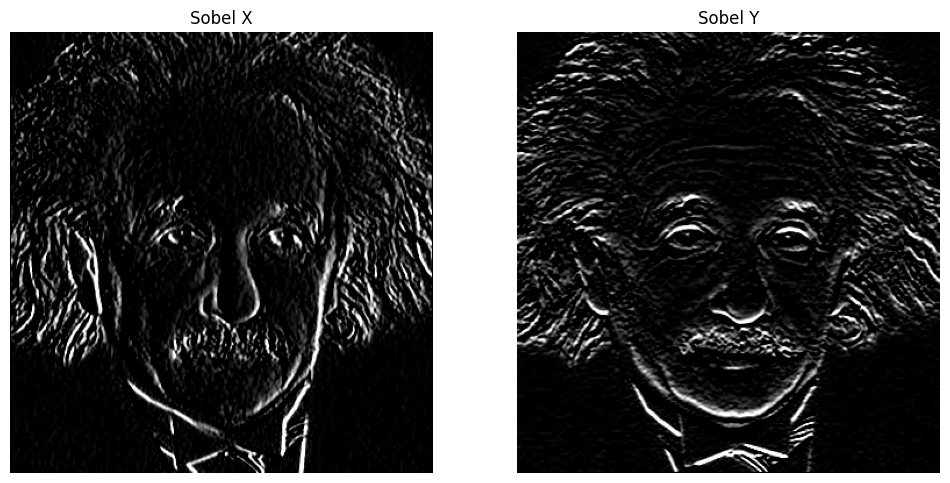

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = r"D:\5th sem\Image processing\Assignment 1 on Intensity Transformations and Neighborhood\Intensity-Transformations-and-Neighborhood\a1images\einstein.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define the Sobel filters
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]], dtype="int")
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype="int")

# Apply the Sobel filter for X and Y direction
sobel_filtered_x = cv2.filter2D(image, -1, sobel_x)
sobel_filtered_y = cv2.filter2D(image, -1, sobel_y)

# Combine the two directions
# sobel_combined = cv2.addWeighted(sobel_filtered_x, 0.5, sobel_filtered_y, 0.5, 0)

# Display the result
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(sobel_filtered_x, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobel_filtered_y, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

##### Written code to Sobel filter the image

(-0.5, 363.5, 379.5, -0.5)

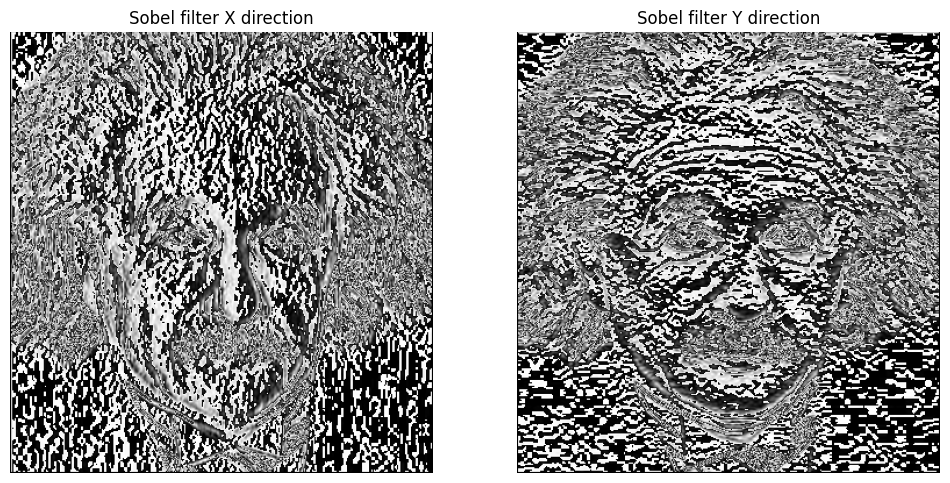

In [5]:
def apply_sobel_filter(image, kernel):
    rows, cols = image.shape
    # Pad the image
    padded_image = np.pad(image, 1, mode='constant')
    # Initialize the output image
    output = np.zeros_like(image)
    # Perform convolution
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            # Extract the region of interest
            roi = padded_image[i-1:i+2, j-1:j+2]
            # Perform element-wise multiplication
            output[i, j] = np.sum(roi * kernel)
    return output

# Apply Sobel filter
sobel_x_output = apply_sobel_filter(image, sobel_x)
sobel_y_output = apply_sobel_filter(image, sobel_y)
# manual_sobel_combined = cv2.addWeighted(sobel_x_output, 0.5, sobel_y_output, 0.5, 0)

# Display the result
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(sobel_x_output, cmap='gray')
plt.title('Sobel filter X direction')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobel_y_output, cmap='gray')
plt.title('Sobel filter Y direction')
plt.axis('off')


##### Using the property to carry out Sobel filtering

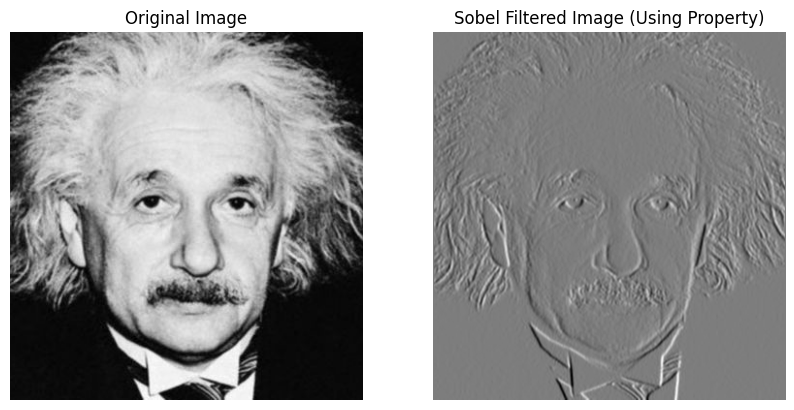

In [7]:
# Load the grayscale image
image_gray = cv2.imread(r"D:\5th sem\Image processing\Assignment 1 on Intensity Transformations and Neighborhood\Intensity-Transformations-and-Neighborhood\a1images\einstein.png", cv2.IMREAD_GRAYSCALE)

# Define the 1D Sobel kernels
sobel_vertical = np.array([[1], [2], [1]])  # Vertical kernel
sobel_horizontal = np.array([[1, 0, -1]])   # Horizontal kernel

# Apply the vertical Sobel filter
gradient_x = cv2.filter2D(image_gray, cv2.CV_64F, sobel_horizontal)  # Using horizontal kernel
# Now apply the vertical kernel to the result
sobel_filtered_image = cv2.filter2D(gradient_x, cv2.CV_64F, sobel_vertical)

# Normalize the output image to the range [0, 255]
sobel_filtered_image = cv2.normalize(sobel_filtered_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Display the original and Sobel filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobel_filtered_image, cmap='gray')
plt.title('Sobel Filtered Image (Using Property)')
plt.axis('off')

plt.show()